In [43]:
# pip install imblearn

In [2]:
# utilities
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore') 

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.classifier.rocauc import roc_auc

# sklearn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score, auc

   id                       date  \
0   2  2022-09-09 03:04:00+00:00   
1   3  2022-09-09 02:15:19+00:00   
2   4  2022-09-08 23:45:04+00:00   
3   5  2022-09-08 19:12:20+00:00   
4   6  2022-09-08 17:48:43+00:00   

                                             content  Emotion  
0  posted reposted from may they rest peace and p...      5.0  
1  reporting today with for the death queen eliza...      3.0  
2  the choir practicing tonight for longplanned m...      3.0  
3         rip your royal majesty cry toronto ontario      7.0  
4  the flags are being lowered half mast after th...      0.0  
----------------------
Total Null values: 21
----------------------
----------------------------------------------
Total Null values after dropping null rows: 0
----------------------------------------------
Length of data set:  4041
Shape of data set:  (4041, 4)
Dataset information
-------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4041 entries, 0 to 4061
Data columns (total 4

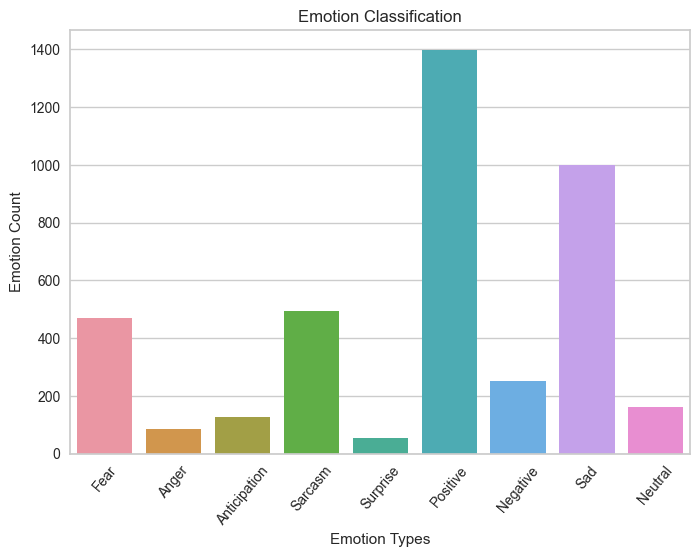

Shape of train data (3232,)
Shape of train data (809,)
No. of feature_words:  20000
No. of feature_words:  3000
Class=0, n=471 (11.656%)
Class=1, n=85 (2.103%)
Class=2, n=127 (3.143%)
Class=3, n=495 (12.249%)
Class=4, n=54 (1.336%)
Class=5, n=1397 (34.571%)
Class=6, n=252 (6.236%)
Class=7, n=1000 (24.746%)
Class=10, n=160 (3.959%)
--------------------
Before oversampling
--------------------
Counter({5.0: 1104, 7.0: 796, 3.0: 405, 0.0: 374, 6.0: 208, 10.0: 131, 2.0: 97, 1.0: 72, 4.0: 45})
--------------------
Class=0, n=374 (11.572%)
Class=1, n=72 (2.228%)
Class=2, n=97 (3.001%)
Class=3, n=405 (12.531%)
Class=4, n=45 (1.392%)
Class=5, n=1104 (34.158%)
Class=6, n=208 (6.436%)
Class=7, n=796 (24.629%)
Class=10, n=131 (4.053%)
--------------------------------
After SMOTE + ENN oversampling - TF-IDF vectorizer
--------------------------------
Class=0, n=1077 (13.900%)
Class=1, n=1101 (14.210%)
Class=2, n=1104 (14.249%)
Class=3, n=747 (9.641%)
Class=4, n=1104 (14.249%)
Class=5, n=141 (1.820

In [3]:
# Get base path
base_path  = os.path.normpath(os.getcwd() + os.sep + os.pardir)

# Set file path
input_file_path = base_path + '\\Preprocessing\\'

%run "{input_file_path}smote_oversampling.ipynb"

In [4]:
def model_evaluate(y_test, y_pred):
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

In [5]:
def plot_confusion_matirx(y_test, y_pred):

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
   
    cm_df = pd.DataFrame(cf_matrix,
                     index = ['Fear','Anger', 'Anticipation', 'Sarcasm', 'Surprise', 'Positive', 'Negative', 'Sad', 'Neutral'], 
                     columns = ['Fear','Anger', 'Anticipation', 'Sarcasm', 'Surprise', 'Positive', 'Negative', 'Sad', 'Neutral'])    

    fig = plt.figure()
    sns.heatmap(cm_df, annot=True, cmap = 'Blues')
    plt.xlabel("Predicted values")
    plt.ylabel("Actual values" )
    plt.title ("Confusion Matrix")
    plt.show()

-------------------------
C =  0.01
5.061915778373085
[0.0]
-------------------------
C =  0.1
5.271609244781545
[0.0, 0.0]
-------------------------
C =  1
5.300605185029809
[0.0, 0.0, 0.0]
-------------------------
C =  5
5.311786925894741
[0.0, 0.0, 0.0, 0.0]
-------------------------
C =  10
5.314578685158557
[0.0, 0.0, 0.0, 0.0, 0.0]
-------------------------
C =  100
5.321667814818318
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.7377405610279265, 0.8970072679564339, 0.9854159395239386, 0.9940629334221871, 0.9950956912888648, 0.996257148212166]
Highest CV score:  0.996257148212166
C:  100


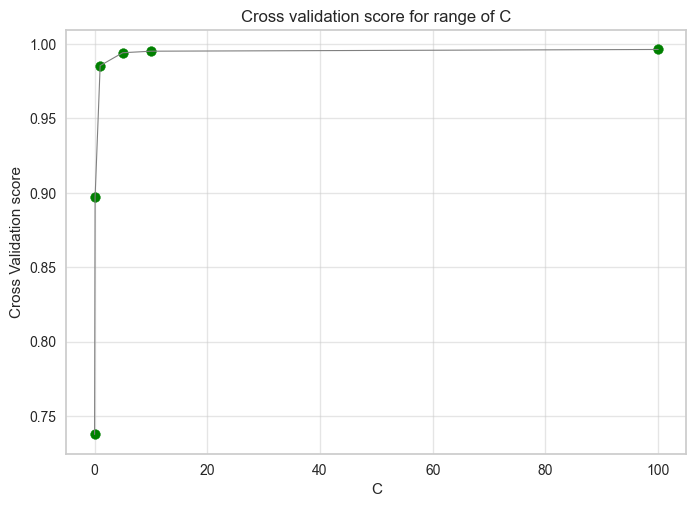

In [27]:
# Using k fold cross validation for choosing hyperparameter C
C = [0.01, 0.1, 1, 5, 10, 100]

c = 0
high_cv_score = 0
cv_scores = []
mean_error=[]
std_error=[]

for i in C:
    print('-------------------------')
    print('C = ', i)    
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=i, max_iter=1000)
    model.fit(X_train_tfidf_smote, y_train_tfidf_smote)
    y_pred = model.predict(X_test_tfidf_vect)
    score = np.mean(cross_val_score(model, X_train_tfidf_smote, y_train_tfidf_smote, cv=5))
    cv_scores.append(score)
    if (score > high_cv_score):
        high_cv_score = score
        c = i
    y_pred = model.predict(X_test_tfidf_vect)
    temp = mean_squared_error(y_test, y_pred, squared=False)
    print(temp)
    mean_error.append(np.array(temp).mean()) 
    std_error.append(np.array(temp).std())
    print(std_error)
    
print(cv_scores)
print('Highest CV score: ',high_cv_score)
print('C: ', c)

# # Plot error bar
# plt.title("Prediction Error vs C")
# plt.errorbar(C,mean_error,yerr=std_error)
# plt.xlabel('C', fontweight ='bold'); plt.ylabel('Mean Square Error', fontweight ='bold')
# plt.show()

fig, ax = plt.subplots()
plt.scatter(C,cv_scores, color='green')
plt.plot(C,cv_scores, color='gray', linewidth=0.8)
plt.title('Cross validation score for range of C')
plt.xlabel('C')
plt.ylabel('Cross Validation score')
plt.grid(alpha=0.5)
plt.show()
    

              precision    recall  f1-score   support

         0.0       0.12      1.00      0.22        97
         1.0       0.00      0.00      0.00        13
         2.0       0.00      0.00      0.00        30
         3.0       0.00      0.00      0.00        90
         4.0       0.00      0.00      0.00         9
         5.0       0.00      0.00      0.00       293
         6.0       0.00      0.00      0.00        44
         7.0       0.00      0.00      0.00       204
        10.0       0.00      0.00      0.00        29

    accuracy                           0.12       809
   macro avg       0.01      0.11      0.02       809
weighted avg       0.01      0.12      0.03       809



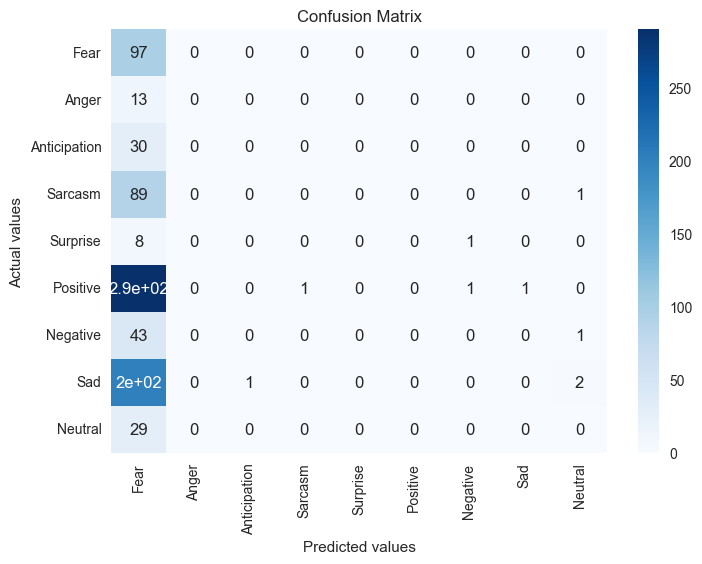

Logistic regression tfidf accuracy: 0.11990111248454882


In [17]:
# Build Logistic model - tf-idf train data
# c = find_c(X_train_tfidf_smote, X_test_tfidf_vect, y_train_tfidf_smote, y_test)

logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1, max_iter=1000)
logistic_model.fit(X_train_tfidf_smote, y_train_tfidf_smote)
y_pred = logistic_model.predict(X_test_tfidf_vect)
model_evaluate(y_test, y_pred)
plot_confusion_matirx(y_test, y_pred)

# Accuracy score
print('Logistic regression tfidf accuracy: %s' % accuracy_score(y_pred, y_test))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        97
         1.0       0.01      0.08      0.02        13
         2.0       0.06      0.13      0.09        30
         3.0       0.00      0.00      0.00        90
         4.0       0.00      0.00      0.00         9
         5.0       0.00      0.00      0.00       293
         6.0       0.06      0.20      0.09        44
         7.0       0.00      0.00      0.00       204
        10.0       0.06      0.76      0.12        29

    accuracy                           0.04       809
   macro avg       0.02      0.13      0.04       809
weighted avg       0.01      0.04      0.01       809



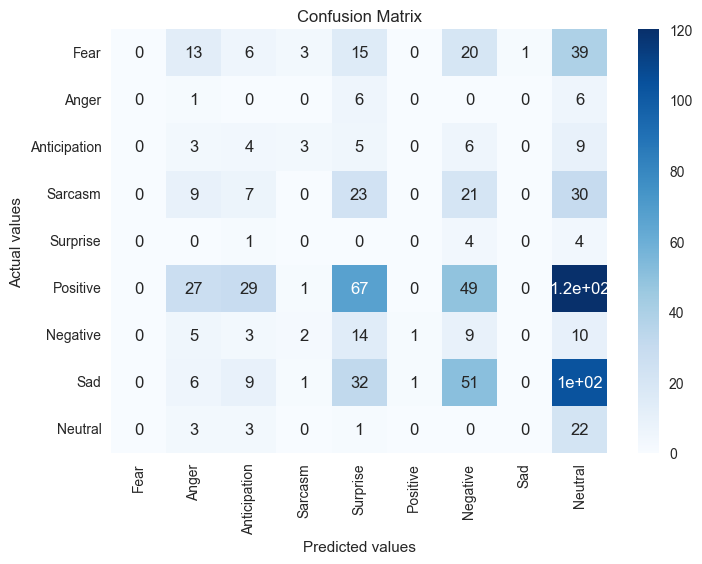

Logistic regression count accuracy: 0.04449938195302843


In [18]:
# Build Logistic model - count train data

logistic_model_c = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1, max_iter=1000)
logistic_model_c.fit(X_train_count_smote, y_train_count_smote)
y_pred = logistic_model_c.predict(X_test_count_vect)
model_evaluate(y_test, y_pred)
plot_confusion_matirx(y_test, y_pred)

# Accuracy score
print('Logistic regression count accuracy: %s' % accuracy_score(y_pred, y_test))

[0.995998500593515, 0.9872215581332391, 0.9883831816572606, 0.9701848018492681, 0.9691523771840315, 0.9275944105458256, 0.9259166579895458, 0.8892639163664382, 0.8874570482517337, 0.8542880942960078]
Highest CV score:  0.995998500593515
k:  1


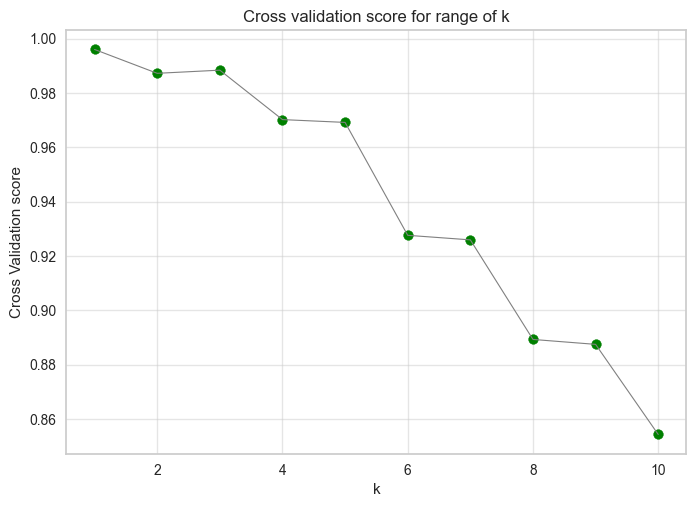

In [23]:
k = [1,2,3,4,5,6,7,8,9,10]
cv_scores_k = []
high_cv_score_k = 0
knn = 0

for i in k:
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(X_train_tfidf_smote, y_train_tfidf_smote)
    score_k = np.mean(cross_val_score(model_knn, X_train_tfidf_smote, y_train_tfidf_smote, cv=5))
    cv_scores_k.append(score_k)
    if (score_k > high_cv_score_k):
        high_cv_score_k = score_k
        knn = i
    y_pred_k = model_knn.predict(X_test_tfidf_vect)

print(cv_scores_k)
print('Highest CV score: ',high_cv_score_k)
print('k: ', knn)

fig, ax = plt.subplots()
plt.scatter(k,cv_scores_k, color='green')
plt.plot(k,cv_scores_k, color='gray', linewidth=0.8)
plt.title('Cross validation score for range of k')
plt.xlabel('k')
plt.ylabel('Cross Validation score')
plt.grid(alpha=0.5)
plt.show()
    

              precision    recall  f1-score   support

         0.0       0.12      1.00      0.21        97
         1.0       0.00      0.00      0.00        13
         2.0       0.00      0.00      0.00        30
         3.0       0.00      0.00      0.00        90
         4.0       0.00      0.00      0.00         9
         5.0       0.00      0.00      0.00       293
         6.0       0.00      0.00      0.00        44
         7.0       0.00      0.00      0.00       204
        10.0       0.00      0.00      0.00        29

    accuracy                           0.12       809
   macro avg       0.01      0.11      0.02       809
weighted avg       0.01      0.12      0.03       809



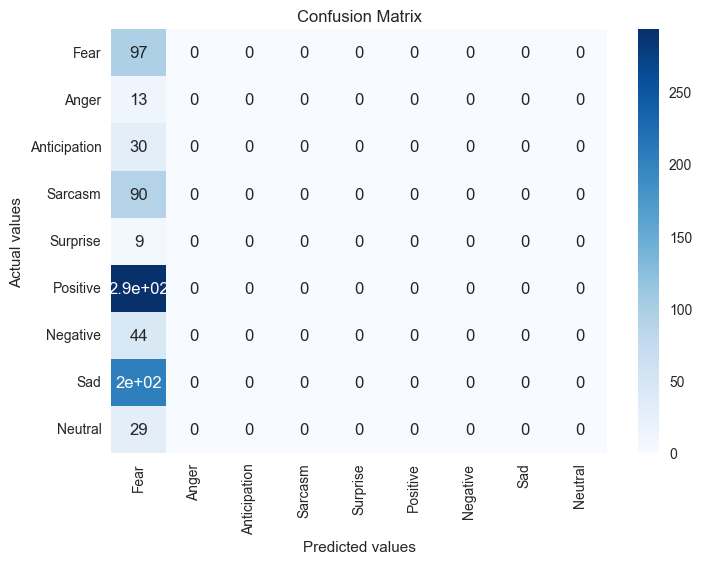

kNN classifier tfidf accuracy: 0.11990111248454882


In [13]:
# Build kNN model - tfidf train data
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_tfidf_smote, y_train_tfidf_smote)
y_pred = knn.predict(X_test_tfidf_vect)

model_evaluate(y_test, y_pred)
plot_confusion_matirx(y_test, y_pred)

# Accuracy score
print('kNN classifier tfidf accuracy: %s' % accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.17      0.02      0.04        97
         1.0       0.02      0.69      0.03        13
         2.0       0.02      0.03      0.02        30
         3.0       0.11      0.04      0.06        90
         4.0       0.04      0.11      0.06         9
         5.0       0.14      0.00      0.01       293
         6.0       0.08      0.02      0.04        44
         7.0       0.32      0.06      0.10       204
        10.0       0.08      0.10      0.09        29

    accuracy                           0.04       809
   macro avg       0.11      0.12      0.05       809
weighted avg       0.17      0.04      0.05       809



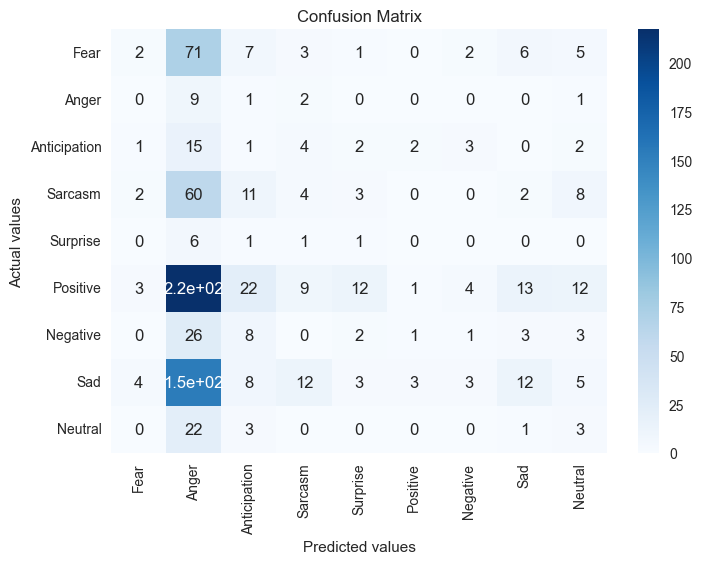

kNN classifier count accuracy: 0.042027194066749075


In [22]:
# Build kNN model - count train data
knn_c = KNeighborsClassifier(n_neighbors=knn)
knn_c.fit(X_train_count_smote, y_train_count_smote)
y_pred = knn_c.predict(X_test_count_vect)

model_evaluate(y_test, y_pred)
plot_confusion_matirx(y_test, y_pred)

# Accuracy score
print('kNN classifier count accuracy: %s' % accuracy_score(y_pred, y_test))

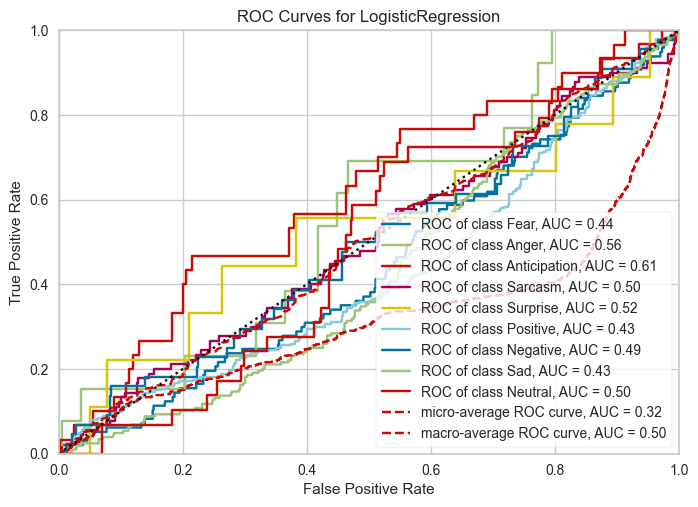

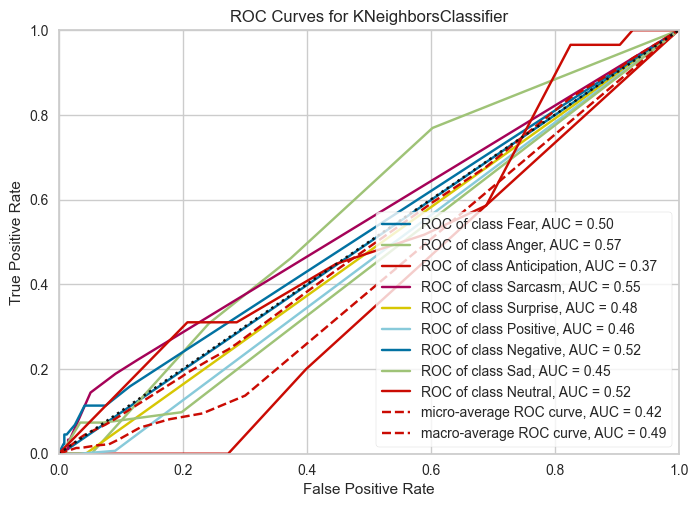

ROCAUC(ax=<AxesSubplot: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['Fear', 'Anger', 'Anticipation', 'Sarcasm', 'Surprise',
                'Positive', 'Negative', 'Sad', 'Neutral'],
       estimator=KNeighborsClassifier(n_neighbors=10))

In [19]:
# plot_ROC_curve
roc_auc(logistic_model, X_train_tfidf_smote, y_train_tfidf_smote, X_test=X_test_tfidf_vect, y_test=y_test, 
    classes=['Fear','Anger','Anticipation','Sarcasm','Surprise','Positive','Negative','Sad','Neutral'])

roc_auc(knn_c, X_train_count_smote, y_train_count_smote, X_test=X_test_count_vect, y_test=y_test, 
    classes=['Fear','Anger','Anticipation','Sarcasm','Surprise','Positive','Negative','Sad','Neutral'])